<a href="https://colab.research.google.com/github/Slimacar/Academicos/blob/main/Copy_of_codigo_checkpoint1_Statistic_1TSCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1

## Carregar módulos

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [42]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [43]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [44]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [45]:
dados_paises_covid['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

## Ajustes



- Nomes das colunas

In [46]:
dados_paises_covid.rename(columns={"Province/State": "province", 
                                   "Country/Region": "country"}, 
                          inplace=True)

In [47]:
dados_paises_covid_dead.rename(columns={"Province/State": "province", 
                                        "Country/Region": "country"}, 
                               inplace=True)

In [48]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [49]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                             var_name = 'date', 
                                             value_name = 'infected')

In [50]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'], 
                                                       var_name = 'date', 
                                                       value_name = 'dead')

In [51]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [52]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [53]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'], 
                                            infer_datetime_format='True')

In [54]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'], 
                                                 infer_datetime_format='True')

In [55]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [56]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [57]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [58]:
dados_paises_covid.shape

(330327, 6)

In [59]:
dados_paises_covid_dead.shape

(330327, 6)

In [60]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead, 
                       on = ['province', 'country',	'Lat',	'Long',	'date'], 
                       how = 'inner')

In [61]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [62]:
dados_covid.shape

(330327, 7)

## Aqui começa o trabalho



#GRUPO:

>GABRIEL DE SOUZA DENTE - RM550796 
>GIOVANNA GONÇALVES DE ALMINDO - RM99992 
>LEANDRO DIAS VIEIRA - RM550997 
>LUCAS NAKANISHI BECK DEPIERI - RM552092 
>SILVIA LIMA CARNEIRO ARAUJO - RM98833

## Questão 1. Quantos países existem no banco de dados?

In [63]:
paises_atualizados = dados_covid[(dados_covid['country'] != 'Antarctica') & (dados_covid['country'] != 'Diamond Princess') & (dados_covid['country'] != 'MS Zaandam')
& (dados_covid['country'] != 'Summer Olympics 2020') & (dados_covid['country'] != 'Winter Olympics 2022') & (dados_covid['province'] != 'Diamond Princess')]

In [64]:
len(paises_atualizados['country'].unique())

196

## Questão 2. Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?

In [65]:
paises_atualizados[paises_atualizados['country'].isin ([ 'Italy' , 'Brazil' , 'US'])& (paises_atualizados['date'] == '2022-03-20')]

,province,country,Lat,Long,date,infected,dead
227763,NaN,Brazil,-14.23500,-51.92530,2022-03-20,29637814,657495
227886,NaN,Italy,41.87194,12.56738,2022-03-20,13861743,157785
227992,NaN,US,40.00000,-100.00000,2022-03-20,79867776,974314


## Questao 3. Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores mortes?

In [66]:
ranking_infected = paises_atualizados.sort_values('infected', ascending = False)
ranking_infected[ranking_infected['date'] == '2022-03-20'].head(10)

,province,country,Lat,Long,date,infected,dead
227992,NaN,US,40.000000,-100.000000,2022-03-20,79867776,974314
227880,NaN,India,20.593684,78.962880,2022-03-20,43009390,516510
227763,NaN,Brazil,-14.235000,-51.925300,2022-03-20,29637814,657495
227863,NaN,France,46.227600,2.213700,2022-03-20,23477062,137831
228010,NaN,United Kingdom,55.378100,-3.436000,2022-03-20,20093762,190536
227867,NaN,Germany,51.165691,10.451526,2022-03-20,18287986,126646
227953,NaN,Russia,61.524010,105.318756,2022-03-20,17327694,357234
227990,NaN,Turkey,38.963700,35.243300,2022-03-20,14693917,97267
227886,NaN,Italy,41.871940,12.567380,2022-03-20,13861743,157785
227973,NaN,Spain,40.463667,-3.749220,2022-03-20,11324637,101703


In [67]:
ranking_mortos = paises_atualizados.sort_values('dead', ascending = False)
ranking_infected[ranking_infected['date'] == '2022-03-20'].head(10)

,province,country,Lat,Long,date,infected,dead
227992,NaN,US,40.000000,-100.000000,2022-03-20,79867776,974314
227880,NaN,India,20.593684,78.962880,2022-03-20,43009390,516510
227763,NaN,Brazil,-14.235000,-51.925300,2022-03-20,29637814,657495
227863,NaN,France,46.227600,2.213700,2022-03-20,23477062,137831
228010,NaN,United Kingdom,55.378100,-3.436000,2022-03-20,20093762,190536
227867,NaN,Germany,51.165691,10.451526,2022-03-20,18287986,126646
227953,NaN,Russia,61.524010,105.318756,2022-03-20,17327694,357234
227990,NaN,Turkey,38.963700,35.243300,2022-03-20,14693917,97267
227886,NaN,Italy,41.871940,12.567380,2022-03-20,13861743,157785
227973,NaN,Spain,40.463667,-3.749220,2022-03-20,11324637,101703


## Questao 4. Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que possuem maiores valores desta taxa? Você acredita que a taxa de mortalidade uma boa métrica? Quais vieses você conseguiu perceber?

In [68]:
data_atualizada = paises_atualizados[paises_atualizados['date'] == '2022-03-20']

In [86]:
data_atualizada['mortalidade'] = round((data_atualizada['dead'] / data_atualizada['infected'])*100 ,2)

<ipython-input-86-e19105295cec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_atualizada['mortalidade'] = round((data_atualizada['dead'] / data_atualizada['infected'])*100 ,2)


In [87]:
data_atualizada.sort_values('mortalidade', ascending=False).head(11)

,province,country,Lat,Long,date,infected,dead,mortalidade
228018,NaN,Yemen,15.552727,48.516388,2022-03-20,11801,2140,18.13
227975,NaN,Sudan,12.862800,30.217600,2022-03-20,61775,4888,7.91
227804,Hubei,China,30.975600,112.270700,2022-03-20,68391,4512,6.60
227947,NaN,Peru,-9.190000,-75.015200,2022-03-20,3541397,211865,5.98
227917,NaN,Mexico,23.634500,-102.552800,2022-03-20,5633928,322072,5.72
227980,NaN,Syria,34.802075,38.996815,2022-03-20,55558,3127,5.63
227970,NaN,Somalia,5.152149,46.199616,2022-03-20,26410,1361,5.15
227843,NaN,Egypt,26.820553,30.802498,2022-03-20,495373,24277,4.90
227732,NaN,Afghanistan,33.939110,67.709953,2022-03-20,177093,7654,4.32
227761,NaN,Bosnia and Herzegovina,43.915900,17.679100,2022-03-20,373985,15664,4.19


# Resposta. 

Analisando as informaçoes percebe-se que os 10 países no ranking de infectados e mortos foram os mesmos e na mesma ordem. Porém, eles não aparecem entre no ranking de mortalidade.

## Questão 5. Gere os seguintes gráficos:

Text(0, 0.5, 'infected')

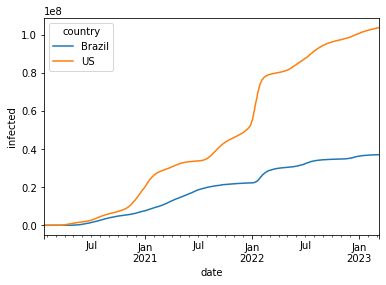

In [71]:
#A Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados Unidos.
paises = paises_atualizados[paises_atualizados['country'].isin(['Brazil', 'US'])]
paises = paises.pivot(index='date', columns='country', values='infected')
axA = paises.plot.line()
plt.xlabel('date')
plt.ylabel('infected')

Text(0, 0.5, 'dead')

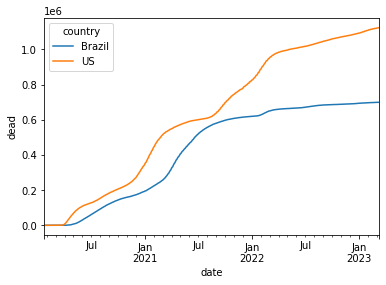

In [72]:
#B Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.
paisesB = paises_atualizados[paises_atualizados['country'].isin(['Brazil', 'US'])]
paisesB = paisesB.pivot(index='date', columns='country', values='dead')
axB = paisesB.plot.line()
plt.xlabel('date')
plt.ylabel('dead')

Text(0, 0.5, 'infected')

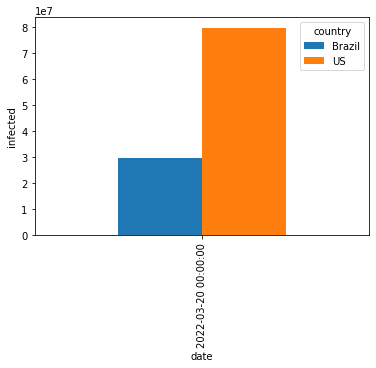

In [73]:
#C Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em 20/mar.
paisesC = paises_atualizados[paises_atualizados['country'].isin(['Brazil', 'US'])]
paisesC = paisesC[paisesC['date'] == '2022-03-20']
paisesC = paisesC.pivot(index='date', columns='country', values='infected')
axC = paisesC.plot.bar()
plt.xlabel('date')
plt.ylabel('infected')

Text(0, 0.5, 'dead')

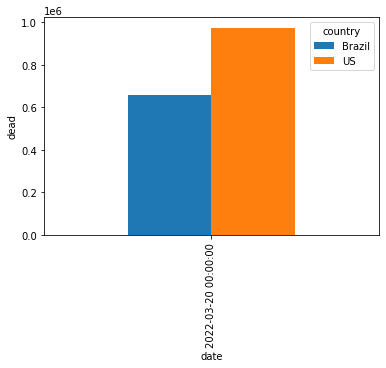

In [74]:
#D Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em 20/mar.
paisesD = paises_atualizados[paises_atualizados['country'].isin(['Brazil', 'US'])]
paisesD = paisesD[paisesD['date'] == '2022-03-20']
paisesD = paisesD.pivot(index='date', columns='country', values='dead')
axD = paisesD.plot.bar()
plt.xlabel('date')
plt.ylabel('dead')

Text(0, 0.5, 'dead')

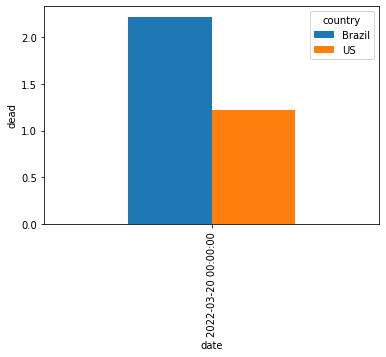

In [75]:
#E Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.
paisesE = data_atualizada[data_atualizada['country'].isin(['Brazil', 'US'])]
paisesE = paisesE[paisesE['date'] == '2022-03-20']
paisesE = paisesE.pivot(index='date', columns='country', values='mortalidade')
axE= paisesE.plot.bar()
plt.xlabel('date')
plt.ylabel('dead')